# Python | Machine Learning
## Previsão da evolução do COVID-19 no Brasil
### Análise de séries temporais sobre a disseminação do vírus COVID-19
Estudo dos padrões de disseminação da doença, números de infectados, recuperados, óbitos e vacinados para construir modelos de previsão para os números nos próximos meses.
- Dataset:

  https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
  https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/country_data/Brazil.csv

In [14]:
#Bibliotecas
import pandas as pd
import plotly.express as px  
import numpy as np 
import plotly.graph_objects as go

In [5]:
#Carregar os dados
dados_globais = 'time_series_covid19_{}_global.csv'
categorias_globais = ['Confirmed', 'Deaths', 'Recovered']
global_df = dict()
for cat in categorias_globais: 
    global_df[cat] = pd.read_csv(dados_globais.format(cat))

In [6]:
#Pré-procesamento dos dados
for campo, df in global_df.items(): 
    df = df.groupby('Country/Region', as_index=False).sum()
    df = df.melt(id_vars=['Country/Region', 'Lat', 'Long'], value_name='Contagem')
    df['Tipo'] = campo
    df.columns =  ['Pais', 'Latitude', 'Longitude', 'Data', 'Contagem', 'Tipo']
    global_df[campo] = df

In [7]:
df_completo = pd.concat(global_df.values())
df_completo['Data'] = pd.to_datetime(df_completo['Data'])
df_completo

,Pais,Latitude,Longitude,Data,Contagem,Tipo
0,Afghanistan,33.939110,67.709953,2020-01-22,0,Confirmed
1,Albania,41.153300,20.168300,2020-01-22,0,Confirmed
2,Algeria,28.033900,1.659600,2020-01-22,0,Confirmed
3,Andorra,42.506300,1.521800,2020-01-22,0,Confirmed
4,Angola,-11.202700,17.873900,2020-01-22,0,Confirmed
...,...,...,...,...,...,...
95337,Vietnam,14.058324,108.277199,2021-05-29,2896,Recovered
95338,West Bank and Gaza,31.952200,35.233200,2021-05-29,300524,Recovered
95339,Yemen,15.552727,48.516388,2021-05-29,3399,Recovered
95340,Zambia,-13.133897,27.849332,2021-05-29,91594,Recovered


In [8]:
#Vacinação

url = 'https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/country_data/Brazil.csv?raw=true'

df_ = pd.read_csv(url, parse_dates=['date'])
del df_['location']
del df_['source_url']

# Análises
## Período Total

In [9]:
#Brasil - Casos Confirmados
brasil = df_completo.loc[(df_completo.Pais == 'Brazil') & (df_completo.Tipo == 'Confirmed')]

In [10]:
#Brasil - Mortes
brasilMortes = df_completo.loc[(df_completo.Pais == 'Brazil') & (df_completo.Tipo == 'Deaths')]

In [11]:
#Brasil - Recuperados
brasilRecuperados = df_completo.loc[(df_completo.Pais == 'Brazil') & (df_completo.Tipo == 'Recovered')]

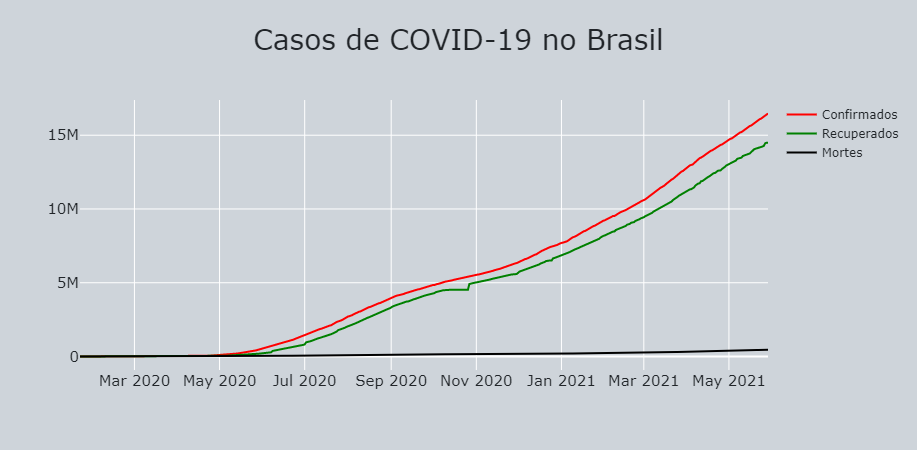

In [16]:
#Gráfico - Situação Geral
fig = go.Figure()
#Adicionar camada de dados
fig.add_trace(
    go.Scatter(x=brasil.Data, y=brasil.Contagem, name='Confirmados', mode= "lines", 
              line=dict(color='red'))
)
fig.add_trace(
    go.Scatter(x=brasilRecuperados.Data, y=brasilRecuperados.Contagem, name='Recuperados', mode= "lines", 
              line=dict(color='green'))
)
fig.add_trace(
    go.Scatter(x=brasilMortes.Data, y=brasilMortes.Contagem, name='Mortes', mode= "lines", 
              line=dict(color='Black'))
)
#Editar o layout
fig.update_layout(title='Casos de COVID-19 no Brasil', title_x=0.5,
                 paper_bgcolor='rgb(206, 212, 218)',
                 plot_bgcolor='rgba(0,0,0,0)',
                 font_color='rgb(33, 37, 41)',
                 title_font_size=28,
                 yaxis = dict(tickfont = dict(size=15)),
                 xaxis = dict(tickfont = dict(size=15)))
fig.show()

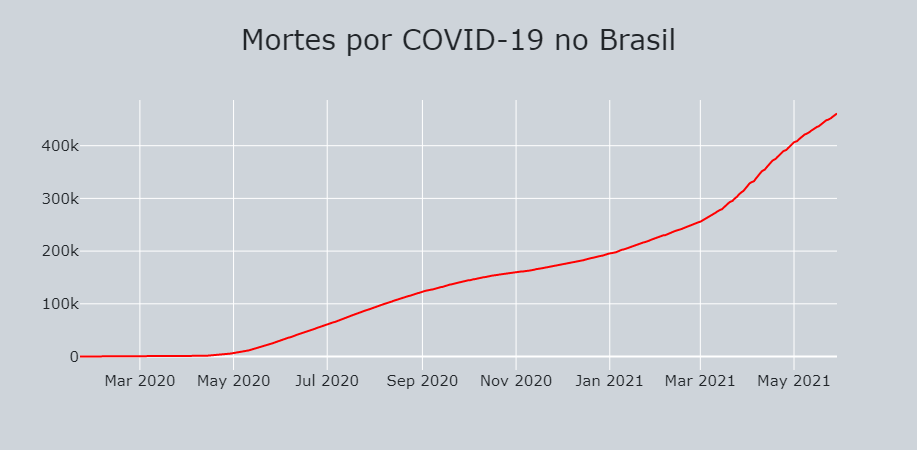

In [17]:
#Gráfico - Mortes no Brasil
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=brasilMortes.Data, y=brasilMortes.Contagem, name='Mortes', mode= "lines", 
              line=dict(color='red'))
)
fig.update_layout(title='Mortes por COVID-19 no Brasil', title_x=0.5,
                 paper_bgcolor='rgb(206, 212, 218)',
                 plot_bgcolor='rgba(0,0,0,0)',
                 font_color='rgb(33, 37, 41)',
                 title_font_size=28,
                 yaxis = dict(tickfont = dict(size=15)),
                 xaxis = dict(tickfont = dict(size=15)))
fig.show()

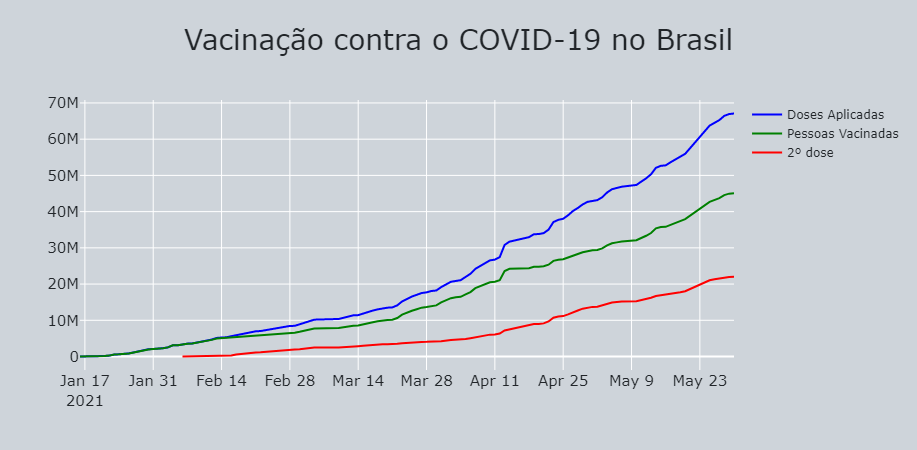

In [18]:
#Vacinação
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=df_.date, y=df_.total_vaccinations, name='Doses Aplicadas', mode= "lines", 
              line=dict(color='blue'))
)
fig.add_trace(
    go.Scatter(x=df_.date, y=df_.people_vaccinated, name='Pessoas Vacinadas', mode= "lines", 
              line=dict(color='green'))
)
fig.add_trace(
    go.Scatter(x=df_.date, y=df_.people_fully_vaccinated, name='2º dose', mode= "lines", 
              line=dict(color='red'))
)
fig.update_layout(title='Vacinação contra o COVID-19 no Brasil', title_x=0.5,
                 paper_bgcolor='rgb(206, 212, 218)',
                 plot_bgcolor='rgba(0,0,0,0)',
                 font_color='rgb(33, 37, 41)',
                 title_font_size=28,
                 yaxis = dict(tickfont = dict(size=15)),
                 xaxis = dict(tickfont = dict(size=15)))
fig.show()

## Ocorrências Diárias

In [21]:
#Casos
brasil['Casos_dia'] = list(map(
    lambda x: 0 if (x==0) else brasil['Contagem'].iloc[x] - brasil['Contagem'].iloc[x-1],
    np.arange(brasil.shape[0])))

#Mortes
brasil['Mortes_dia'] = list(map(
    lambda x: 0 if (x==0) else brasilMortes['Contagem'].iloc[x] - brasilMortes['Contagem'].iloc[x-1],
    np.arange(brasilMortes.shape[0])))

#Recuperados
brasil['Recuperados_dia'] = list(map(
    lambda x: 0 if (x==0) else brasilRecuperados['Contagem'].iloc[x] - brasilRecuperados['Contagem'].iloc[x-1],
    np.arange(brasilRecuperados.shape[0])))

#Vacinados
df_['dose2_dia'] = list(map(
    lambda x: 0 if (x==0) else df_['people_fully_vaccinated'].iloc[x] - df_['people_fully_vaccinated'].iloc[x-1],
    np.arange(df_.shape[0])
))
df_['dose1_dia'] = list(map(
    lambda x: 0 if (x==0) else df_['people_vaccinated'].iloc[x] - df_['people_vaccinated'].iloc[x-1],
    np.arange(df_.shape[0])
))
df_['doses_dia'] = list(map(
    lambda x: 0 if (x==0) else df_['total_vaccinations'].iloc[x] - df_['total_vaccinations'].iloc[x-1],
    np.arange(df_.shape[0])
))

<ipython-input-21-01ce2890d219>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-21-01ce2890d219>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-21-01ce2890d219>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
#Gráficos - Dados Diários

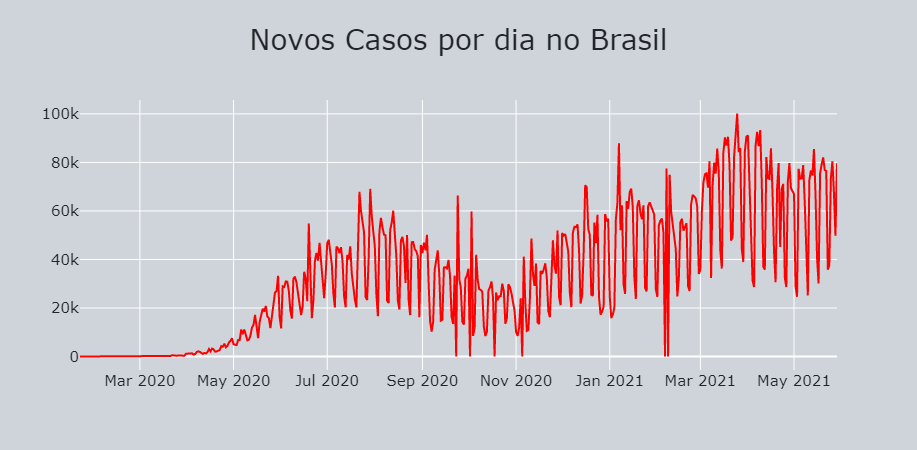

In [22]:
#Novos casos
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=brasil.Data, y=brasil.Casos_dia, name='Novos', mode= "lines", 
              line=dict(color='red'))
)
fig.update_layout(title='Novos Casos por dia no Brasil', title_x=0.5,
                 paper_bgcolor='rgb(206, 212, 218)', 
                 plot_bgcolor='rgba(0,0,0,0)',
                 font_color='rgb(33, 37, 41)',
                 title_font_size=28,
                 yaxis = dict(tickfont = dict(size=15)),
                 xaxis = dict(tickfont = dict(size=15)))
fig.show()

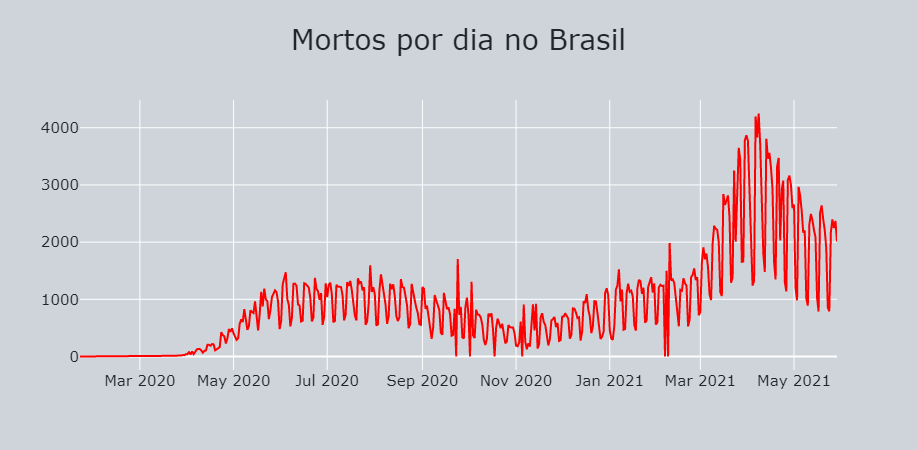

In [23]:
#Novas Mortes

fig = go.Figure()
fig.add_trace(
    go.Scatter(x=brasil.Data, y=brasil.Mortes_dia, name='Mortes', mode= "lines", 
              line=dict(color='red'))
)
fig.update_layout(title='Mortos por dia no Brasil', title_x=0.5,
                 paper_bgcolor='rgb(206, 212, 218)',
                 plot_bgcolor='rgba(0,0,0,0)',
                 font_color='rgb(33, 37, 41)',
                 title_font_size=28,
                 yaxis = dict(tickfont = dict(size=15)),
                 xaxis = dict(tickfont = dict(size=15)))
fig.show()

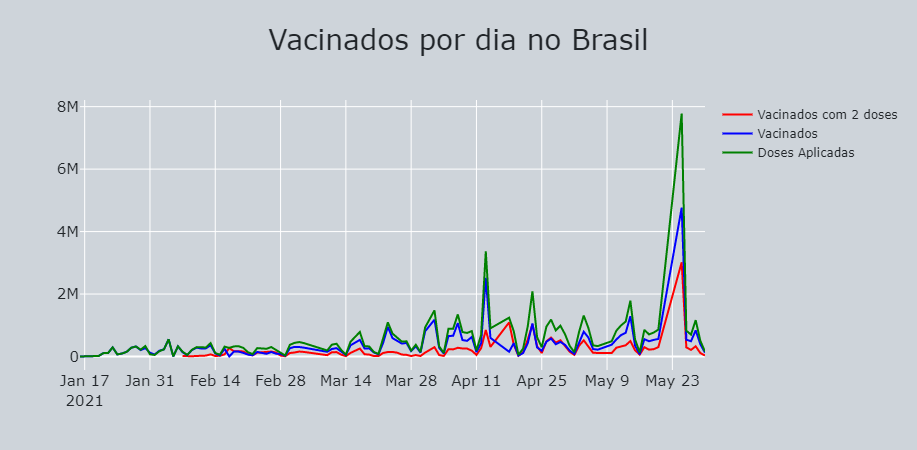

In [24]:
#Novas Vacinados

fig = go.Figure()
fig.add_trace(
    go.Scatter(x=df_.date, y=df_.dose2_dia, name='Vacinados com 2 doses', mode= "lines", 
              line=dict(color='red'))
)
fig.add_trace(
    go.Scatter(x=df_.date, y=df_.dose1_dia, name='Vacinados', mode= "lines", 
              line=dict(color='blue'))
)
fig.add_trace(
    go.Scatter(x=df_.date, y=df_.doses_dia, name='Doses Aplicadas', mode= "lines", 
              line=dict(color='green'))
)
fig.update_layout(title='Vacinados por dia no Brasil', title_x=0.5,
                 paper_bgcolor='rgb(206, 212, 218)',
                 plot_bgcolor='rgba(0,0,0,0)',
                 font_color='rgb(33, 37, 41)',
                 title_font_size=28,
                 yaxis = dict(tickfont = dict(size=15)),
                 xaxis = dict(tickfont = dict(size=15)))
fig.show()

## Taxa de Crescimento

In [26]:
def taxa_crescimento(data, variable, data_inicio=None, data_fim=None):
    if data_inicio == None:
        data_inicio = data.Data.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    if data_fim == None:
        data_fim = data.Data.iloc[-1]
    else:
        data_fim = pd.to_datetime(data_fim)
    
    passado = data.loc[data.Data == data_inicio, variable].values[0]
    presente = data.loc[data.Data == data_fim, variable].values[0]
    
    n = (data_fim - data_inicio).days
    taxa = (presente/passado)**(1/n) - 1
    
    return taxa*100

cresc_medio = taxa_crescimento(brasil, 'Contagem')
print(f"O crescimento médio do COVID no Brasil no período avaliado foi de {cresc_medio.round(2)}%.")

O crescimento médio do COVID no Brasil no período avaliado foi de 3.69%.


In [19]:
#Taxa de Crescimento Diário

In [27]:
def taxa_crescimento_diaria(data, variable, data_inicio=None):
    if data_inicio == None:
        data_inicio = data.Data.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    data_fim = data.Data.max()
    n = (data_fim - data_inicio).days
    
    taxas = list(map(
        lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1]) / data[variable].iloc[x-1],
        range(1,n+1)
    ))
    return np.array(taxas)*100

tx_dia = taxa_crescimento_diaria(brasil, 'Contagem')

<ipython-input-27-9d44f9fdcc26>:11: RuntimeWarning:

invalid value encountered in longlong_scalars

<ipython-input-27-9d44f9fdcc26>:11: RuntimeWarning:

divide by zero encountered in longlong_scalars



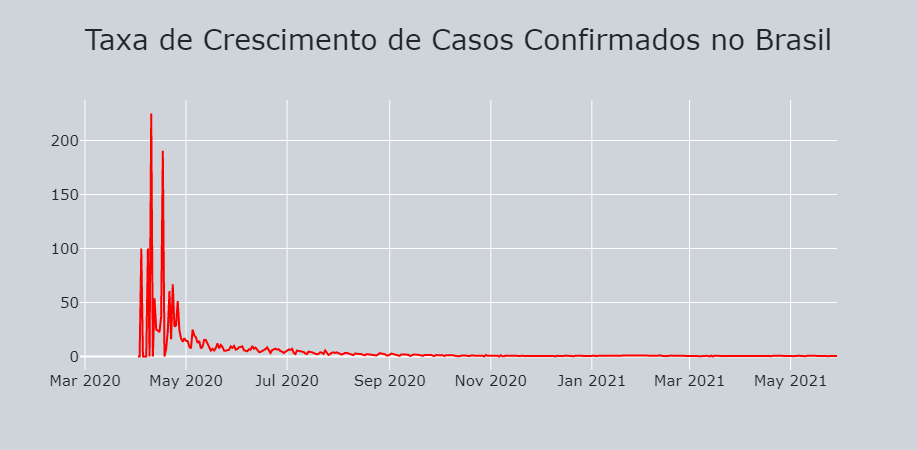

In [28]:
#Gráfico - Taxa de crescimento de casos confirmados

primeiro_dia = brasil.Data.loc[brasil.Contagem > 0].min()

fig = go.Figure()
fig.add_trace(
    go.Scatter(x=pd.date_range(primeiro_dia, brasil.Data.max())[1:], y=tx_dia, name='TaxaCrescimento', mode= "lines", 
              line=dict(color='red'))
)
fig.update_layout(title='Taxa de Crescimento de Casos Confirmados no Brasil', title_x=0.5,
                 paper_bgcolor='rgb(206, 212, 218)',
                 plot_bgcolor='rgba(0,0,0,0)',
                 font_color='rgb(33, 37, 41)',
                 title_font_size=28,
                 yaxis = dict(tickfont = dict(size=15)),
                 xaxis = dict(tickfont = dict(size=15)))
fig.show()

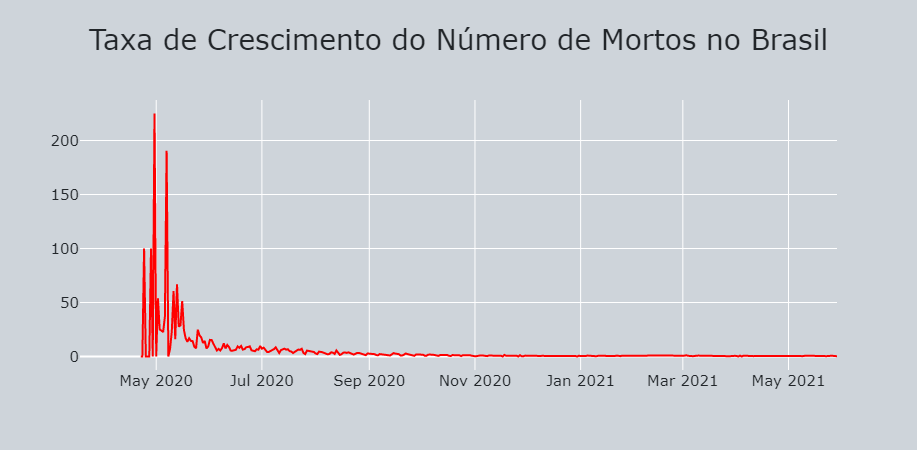

In [29]:
#Gráfico - Taxa de crescimento do número de mortes no Brasil

primeiro_dia = brasilMortes.Data.loc[brasilMortes.Contagem > 0].min()

fig = go.Figure()
fig.add_trace(
    go.Scatter(x=pd.date_range(primeiro_dia, brasilMortes.Data.max())[1:], y=tx_dia, name='TaxaCrescimento', mode= "lines", 
              line=dict(color='red'))
)
fig.update_layout(title='Taxa de Crescimento do Número de Mortos no Brasil', title_x=0.5,
                 paper_bgcolor='rgb(206, 212, 218)',
                 plot_bgcolor='rgba(0,0,0,0)',
                 font_color='rgb(33, 37, 41)',
                 title_font_size=28,
                 yaxis = dict(tickfont = dict(size=15)),
                 xaxis = dict(tickfont = dict(size=15)))
fig.show()

# Predições

In [30]:
#Importar bibliotecas
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

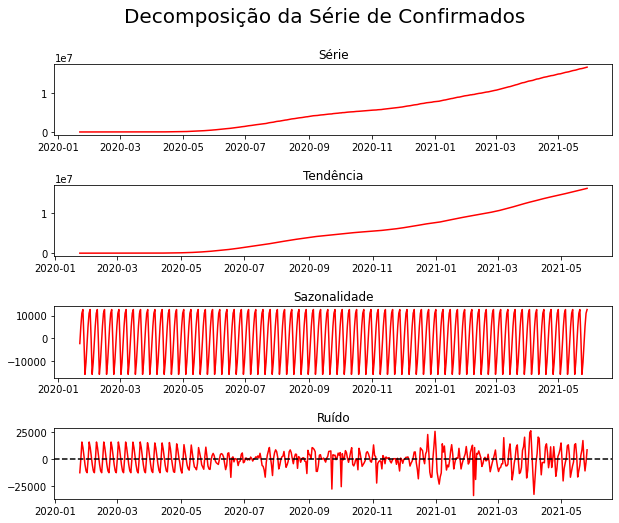

In [31]:
#Confirmados

#Pré-tratamento dos dados
confirmados = brasil.Contagem
confirmados.index = brasil.Data

#Decomposição da serie 
res2 = seasonal_decompose(confirmados)

#Gráficos - Decomposição da Série de Confirmados
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4, 1,figsize=(10,8))
fig.subplots_adjust(hspace=0.7)
fig.suptitle('Decomposição da Série de Confirmados', size=20)
ax1.plot(res2.observed, c='red')
ax2.plot(res2.trend, c='red')
ax3.plot(res2.seasonal, c='red')
ax4.plot(confirmados.index, res2.resid, c='red')
ax4.axhline(0, linestyle='dashed', c='black')
ax1.set_title('Série')
ax2.set_title('Tendência')
ax3.set_title('Sazonalidade')
ax4.set_title('Ruído') 

plt.show() 

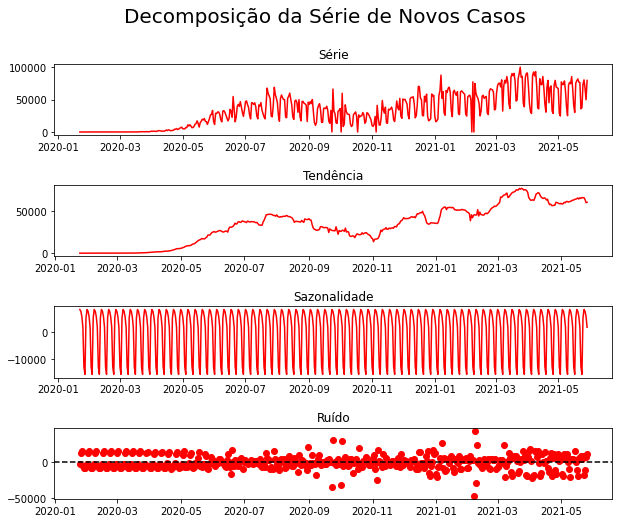

In [32]:
#Novos Casos

#Pré-tratamento dos dados
novoscasos = brasil.Casos_dia
novoscasos.index = brasil.Data

#Decomposição da série
res = seasonal_decompose(novoscasos)

#Gráficos - Decomposição da Série de Novos Casos
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4, 1,figsize=(10,8))
fig.subplots_adjust(hspace=0.7)
fig.suptitle('Decomposição da Série de Novos Casos', size=20)
ax1.plot(res.observed, c='red')
ax2.plot(res.trend, c='red')
ax3.plot(res.seasonal, c='red')
ax4.scatter(novoscasos.index, res.resid, c='red')
ax4.axhline(0, linestyle='dashed', c='black')
ax1.set_title('Série')
ax2.set_title('Tendência')
ax3.set_title('Sazonalidade')
ax4.set_title('Ruído') 
plt.show()

## Modelagem

### Forecasting com um AUTO-ARIMA

In [26]:
#Pacote
#!pip install pmdarima

In [33]:
# Ajuste para melhor modelagem Arima
from pmdarima import auto_arima

In [28]:
#Dias em um período
#pd.date_range('2021-05-31', '2021-12-31')

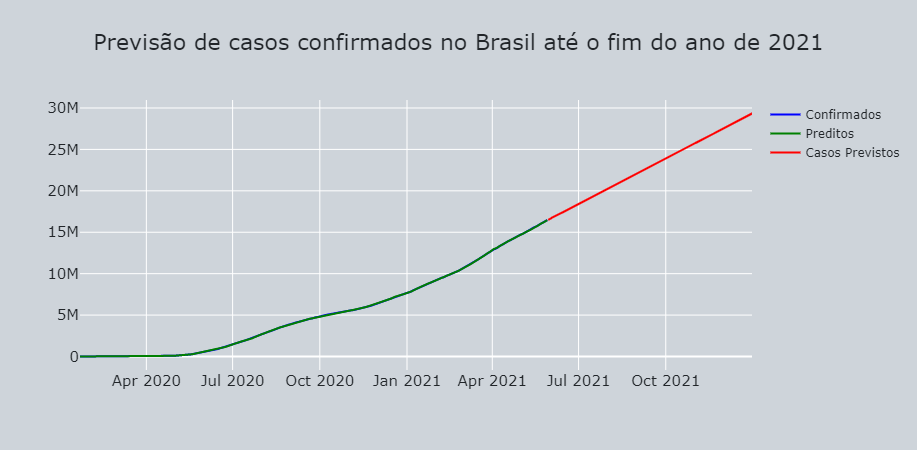

In [34]:
#Casos Confirmados

modelo = auto_arima(confirmados)

fig = go.Figure(go.Scatter(x=confirmados.index, y=confirmados, name='Confirmados', line=dict(color='blue')))

fig.add_trace(go.Scatter(x=confirmados.index, y = modelo.predict_in_sample(), name='Preditos', line=dict(color='green')))
#Definir data de início e fim da predição
fig.add_trace(go.Scatter(x=pd.date_range('2021-05-30', '2021-12-31'), y=modelo.predict(216), name='Casos Previstos', line=dict(color='red')))

fig.update_layout(title='Previsão de casos confirmados no Brasil até o fim do ano de 2021', title_x=0.5,
                 paper_bgcolor='rgb(206, 212, 218)',
                 plot_bgcolor='rgba(0,0,0,0)',
                 font_color='rgb(33, 37, 41)',
                 title_font_size=22,
                 yaxis = dict(tickfont = dict(size=15)),
                 xaxis = dict(tickfont = dict(size=15)))
fig.show()

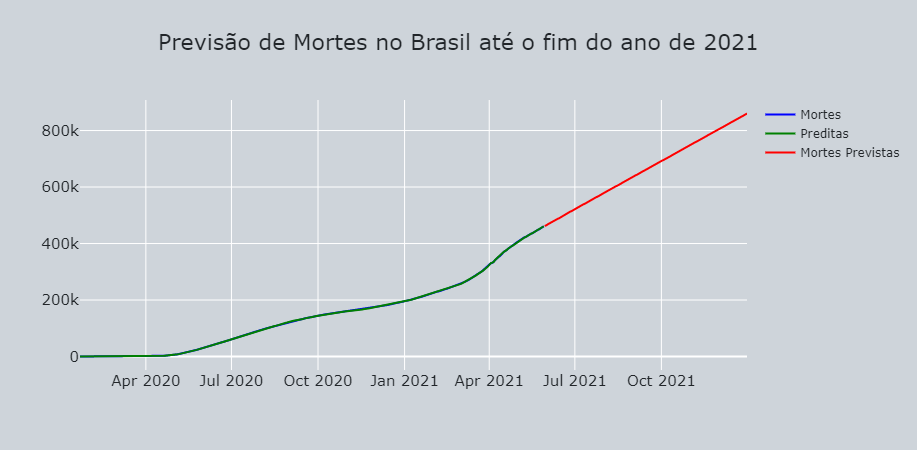

In [35]:
#Mortes

mortes = brasilMortes.Contagem
mortes.index = brasilMortes.Data

modeloM = auto_arima(mortes)

fig = go.Figure(go.Scatter(x=mortes.index, y=mortes, name='Mortes', line=dict(color='blue')))

fig.add_trace(go.Scatter(x=mortes.index, y = modeloM.predict_in_sample(), name='Preditas', line=dict(color='green')))
#Definir data de início e fim da predição
fig.add_trace(go.Scatter(x=pd.date_range('2021-05-30', '2021-12-31'), y=modeloM.predict(216), name='Mortes Previstas', line=dict(color='red')))

fig.update_layout(title='Previsão de Mortes no Brasil até o fim do ano de 2021', title_x=0.5,
                 paper_bgcolor='rgb(206, 212, 218)',
                 plot_bgcolor='rgba(0,0,0,0)',
                 font_color='rgb(33, 37, 41)',
                 title_font_size=22,
                 yaxis = dict(tickfont = dict(size=15)),
                 xaxis = dict(tickfont = dict(size=15)))
fig.show()

### Forecasting com Facebook Prophet

In [31]:
#!conda install -c conda-forge fbprophet -y

In [32]:
#!pip install pystan==2.19.1.1

In [36]:
from fbprophet import Prophet

In [37]:
# Casos confirmados

#Pre-processamentos: definição do ponto de corte para treino e teste, remoção do index
train = confirmados.reset_index()[:-5]
test = confirmados.reset_index()[-5:]

# Redefinição dos nomes das colunas: ds e y)
train.rename(columns={"Data":"ds","Contagem":"y"},inplace=True)
test.rename(columns={"Data":"ds","Contagem":"y"},inplace=True)
test = test.set_index("ds")
test = test['y']

profeta = Prophet(growth="logistic", changepoints=['2020-04-15','2020-04-25','2020-04-26','2020-05-15',
'2020-05-17','2020-05-22','2020-05-25','2020-05-30','2020-06-14','2020-06-19','2020-06-21','2020-07-29',
'2020-08-03','2020-09-04','2020-09-07','2020-10-06','2020-10-12','2020-11-11','2020-12-07','2020-12-16',
'2021-01-02','2021-01-07','2021-01-18','2021-01-27','2021-02-14','2021-02-24','2021-03-08','2021-03-25',
'2021-04-05','2021-04-28','2021-05-10','2021-05-14'])

# Cenário - Considerando a população geral do Brasil e 4 anos

pop = 213145010

train['cap'] = pop

# Treinar o modelo
profeta.fit(train)

# Definição do período da previsão 
future_dates = profeta.make_future_dataframe(periods=1460)
future_dates['cap'] = pop
forecast =  profeta.predict(future_dates)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


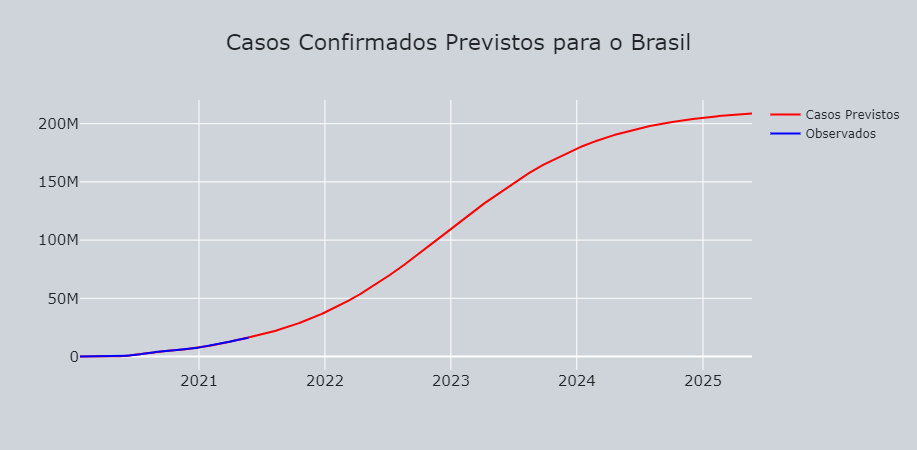

In [38]:
#Gráfico - Casos Corfirmados
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Casos Previstos', line=dict(color='red')))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Observados', line=dict(color='blue')))
fig.update_layout(title='Casos Confirmados Previstos para o Brasil', title_x=0.5,
                 paper_bgcolor='rgb(206, 212, 218)',
                 plot_bgcolor='rgba(0,0,0,0)',
                 font_color='rgb(33, 37, 41)',
                 title_font_size=22,
                 yaxis = dict(tickfont = dict(size=15)),
                 xaxis = dict(tickfont = dict(size=15)))
fig.show()

In [39]:
# Mortes

train = mortes.reset_index()[:-5]
test = mortes.reset_index()[-5:]

train.rename(columns={"Data":"ds","Contagem":"y"},inplace=True)
test.rename(columns={"Data":"ds","Contagem":"y"},inplace=True)
test = test.set_index("ds")
test = test['y']

profeta = Prophet(growth="logistic", changepoints=['2020-04-05', '2020-04-19', '2020-05-10', '2020-05-20', '2020-06-06',
                                                   '2020-06-13', '2020-06-26', '2020-07-24', '2020-09-03', '2020-10-22',
                                                   '2020-11-13', '2020-12-11', '2021-01-29', '2021-03-04', '2021-03-24',
                                                   '2021-04-22', '2021-05-07'])

#Cenário - Considerando um milhão de mortos e um ano

pop = 1000000
train['cap'] = pop

# Treinar o modelo
profeta.fit(train)

# Definição do período da previsão 
future_dates = profeta.make_future_dataframe(periods=365)
future_dates['cap'] = pop
forecast =  profeta.predict(future_dates)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


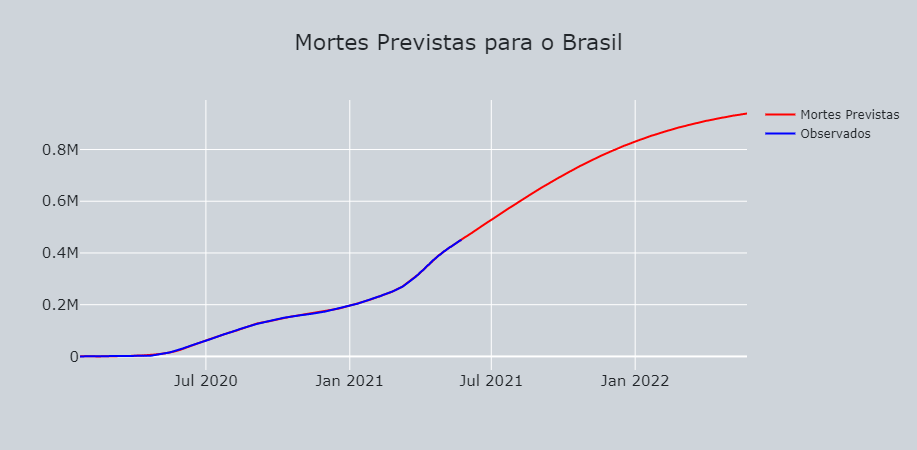

In [40]:
#Gráfico - Mortes
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Mortes Previstas', line=dict(color='red')))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Observados', line=dict(color='blue')))
fig.update_layout(title='Mortes Previstas para o Brasil', title_x=0.5,
                 paper_bgcolor='rgb(206, 212, 218)',
                 plot_bgcolor='rgba(0,0,0,0)',
                 font_color='rgb(33, 37, 41)',
                 title_font_size=22,
                 yaxis = dict(tickfont = dict(size=15)),
                 xaxis = dict(tickfont = dict(size=15)))
fig.show()

In [41]:
# Vacinados - Previsão

vacinados = df_.people_fully_vaccinated
vacinados.index = df_.date

train = vacinados.reset_index()[:-5]
test = vacinados.reset_index()[-5:]

train.rename(columns={"date":"ds","people_fully_vaccinated":"y"},inplace=True)
test.rename(columns={"date":"ds","people_fully_vaccinated":"y"},inplace=True)
test = test.set_index("ds")
test = test['y']

profeta = Prophet(growth="logistic", changepoints=['2021-02-16', '2021-02-20', '2021-02-22', '2021-02-25',
                                                   '2021-02-27', '2021-03-01', '2021-03-05', '2021-05-14',
                                                   '2021-05-21', '2021-04-02', '2021-04-12', '2021-04-19',
                                                   '2021-04-21', '2021-04-24', '2021-05-05', '2021-05-19',
                                                   '2021-05-25' ])

# Cenário - Considerando a população geral do Brasil com mais de 18 anos
pop = 164631000
train['cap'] = pop

profeta.fit(train)

future_dates = profeta.make_future_dataframe(periods=450)
future_dates['cap'] = pop
forecast =  profeta.predict(future_dates)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


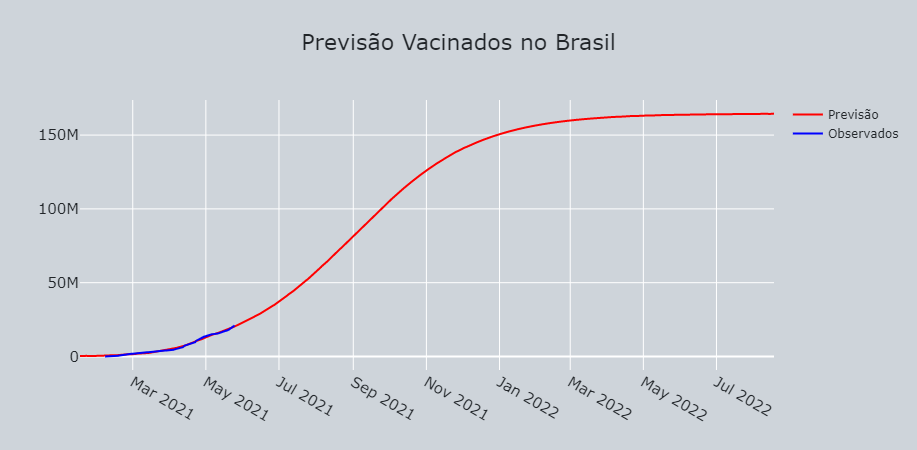

In [42]:
#Gráfico - Previsão vacinados
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Previsão', line=dict(color='red')))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Observados', line=dict(color='blue')))
fig.update_layout(title='Previsão Vacinados no Brasil', title_x=0.5,
                 paper_bgcolor='rgb(206, 212, 218)',
                 plot_bgcolor='rgba(0,0,0,0)',
                 font_color='rgb(33, 37, 41)',
                 title_font_size=22,
                 yaxis = dict(tickfont = dict(size=15)),
                 xaxis = dict(tickfont = dict(size=15)))
fig.show()

In [ ]:
#Gerar HTML dos gráficos
#import plotly.io as pio
#pio.write_html(fig, file='figure.html')